<a href="https://colab.research.google.com/github/vp878/project-of-module-2/blob/main/Project_of_modlule_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Airbnb data analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


github link

# **Problem Statement**


Airbnb, as a leading platform in the accommodation industry, faces the challenge of continuously enhancing its platform to drive increased bookings, revenue, and overall success. This involves understanding the dynamics of the marketplace, traveler preferences, and host behavior to optimize the user experience, pricing strategies, and marketing efforts.

#### **Define Your Business Objective?**


The primary business objective for analyzing the Airbnb data is to enhance the Airbnb platform to drive increased bookings, revenue, and overall success. This overarching objective can be broken down into more specific goals:

Increase Bookings and Occupancy Rates: The core of Airbnb's business is facilitating bookings and connecting travelers with suitable accommodations. Analyzing data to understand traveler preferences, market demand, and pricing dynamics can help optimize the platform to drive higher booking rates and occupancy for hosts, ultimately increasing revenue for both hosts and Airbnb.

Enhance the User Experience: A positive user experience is crucial for attracting and retaining both travelers and hosts on the platform. Analyzing data to personalize recommendations, improve search functionality, and provide relevant information can enhance the user experience, leading to increased satisfaction, loyalty, and ultimately, more bookings.

Empower Hosts with Data-Driven Insights: Hosts play a vital role in the Airbnb ecosystem, and providing them with data-driven insights can empower them to make informed decisions about pricing, listing management, and guest communication. This can lead to optimized pricing strategies, improved listing quality, and enhanced guest experiences, ultimately driving increased bookings and revenue for hosts.

Promote Listings in Underserved Areas: To ensure a balanced distribution of demand and provide travelers with diverse options, Airbnb aims to promote listings in less popular neighborhood groups with higher availability. This benefits both hosts in underserved areas and travelers seeking alternative options, contributing to a more inclusive and sustainable marketplace.

Enhance Host Support and Education: Providing hosts with ongoing support, training, and resources can help them improve their listing quality, guest communication, and overall hosting experience. This empowers hosts to deliver exceptional service, leading to positive guest reviews, increased bookings, and higher earnings, ultimately benefiting the entire Airbnb ecosystem.

Continuously Adapt to Market Dynamics: The accommodation industry is constantly evolving, and Airbnb needs to stay ahead of the curve by continuously analyzing data, monitoring market trends, and adapting its platform and strategies accordingly. This ensures that Airbnb remains competitive, meets the evolving needs of travelers and hosts, and drives sustained success in the long term.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [57]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Importing the dataset
airbnb_df = pd.read_csv('https://drive.google.com/uc?id=1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou&export=download') # Replace with your actual copied link

### Dataset First View

### Dataset Rows & Columns count

In [59]:
# Dataset Rows & Columns
airbnb_df.shape

(48895, 16)

### Dataset Information

In [60]:
# Dataset Info
dataset=airbnb_df.copy()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

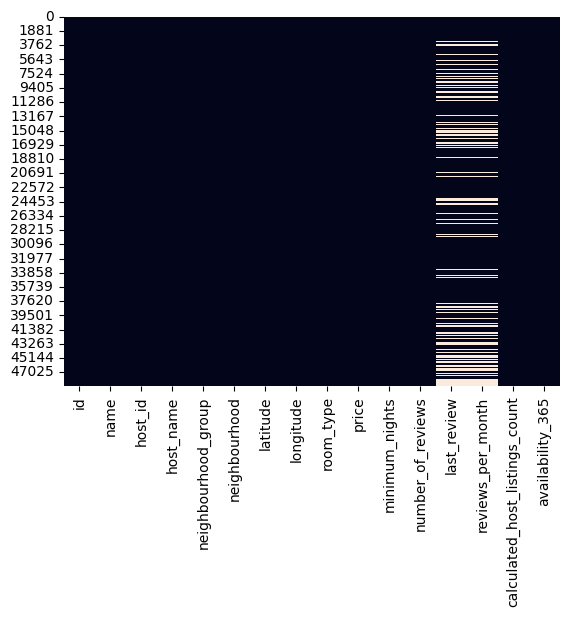

In [63]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [65]:
# Dataset Describe
dataset.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [67]:
# Write your code to make your dataset analysis ready.
pd.set_option('display.max_columns', None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
# display the head rows
pd.set_option('display.max_columns', None)
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
# display the tail rows
pd.set_option('display.max_columns', None)
dataset.tail()







,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [70]:
pd.set_option('display.max_columns', None)
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [71]:
# display the all columns include
pd.set_option('display.max_columns', None)
dataset.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [72]:
# display the columns of dataset
pd.set_option('display.max_columns', None)
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [73]:
# display the datatype
pd.set_option('display.max_columns', None)
dataset.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [74]:
# counting the null value
pd.set_option('display.max_columns', None)
dataset.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [75]:
# counting the dublicate value
pd.set_option('display.max_columns', None)
dataset.duplicated().sum()

0

In [76]:
pd.set_option('display.max_columns', None)
dataset.drop_duplicates(inplace=True)

In [77]:
pd.set_option('display.max_columns', None)
dataset.last_review.fillna(0,inplace=True)

In [78]:
# Replace '0' with NaT (Not a Time) for missing values
dataset['last_review'] = dataset['last_review'].replace('0', pd.NaT)

# Convert 'last_review' to datetime, handling errors
dataset['last_review'] = pd.to_datetime(dataset['last_review'], format='%Y-%m-%d', errors='coerce')

In [79]:
# Convert 'last_review' to datetime, handling errors
dataset['last_review'] = pd.to_datetime(dataset['last_review'], format='%Y-%m-%d', errors='coerce')


In [80]:
# counting the rome type
pd.set_option('display.max_columns', None)
dataset.room_type.value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [81]:
# counting the neighbourhood_group
pd.set_option('display.max_columns', None)
dataset.neighbourhood_group.value_counts()

,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [82]:
# imort libraries
import matplotlib.pyplot as plt
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [83]:
# dataset descrbtion
pd.set_option('display.max_columns', None)
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


#### Bar chart for price, minimum_nights, availability_365

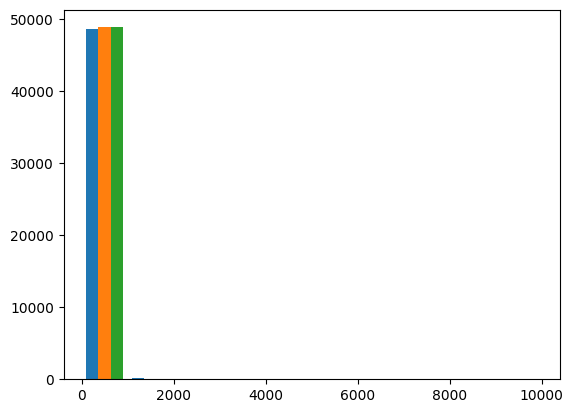

In [84]:
pd.set_option('display.max_columns', None)
dataset[['price', 'minimum_nights', 'availability_365']]
plt.hist(dataset[['price', 'minimum_nights', 'availability_365']])
plt.show()

#### Boxplot of Price

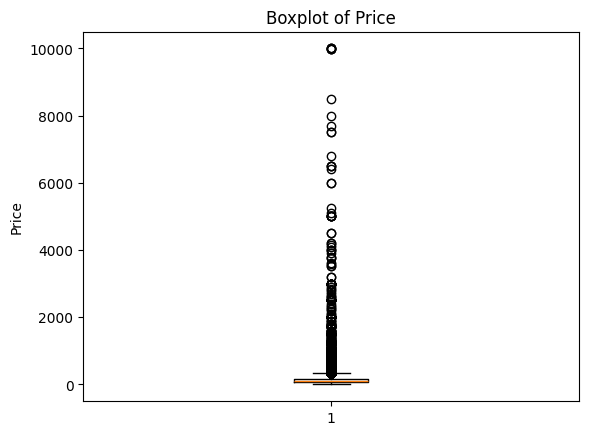

In [85]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
plt.boxplot(dataset['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

#### Boxplot of Numerical Features

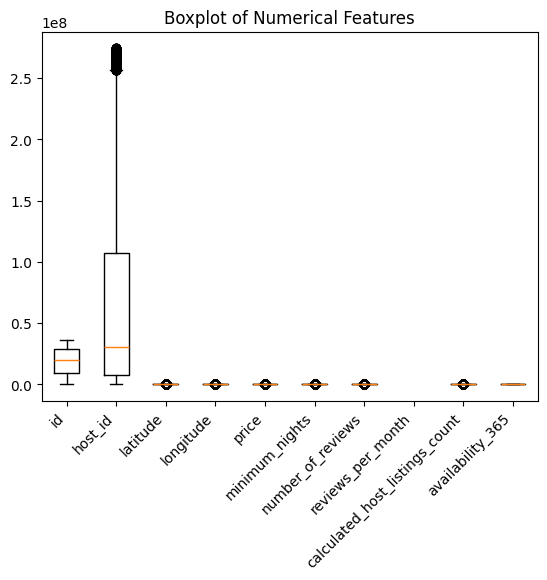

In [86]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot

# Select only numerical columns for the boxplot
numerical_columns = dataset.select_dtypes(include=np.number).columns

plt.boxplot([dataset[col] for col in numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(range(1, len(numerical_columns) + 1), numerical_columns, rotation=45, ha='right')  # Set x-axis labels
plt.show()

#### Scatter Plot of Latitude and Longitude

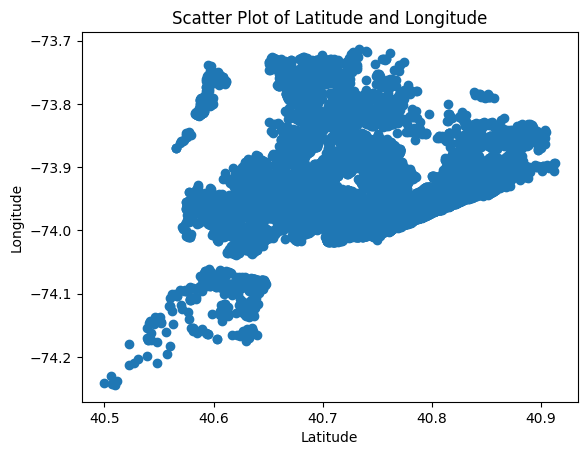

In [87]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
plt.scatter(dataset['latitude'], dataset['longitude'])
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Latitude')  # Set x-axis label
plt.ylabel('Longitude')  # Set y-axis label
plt.show()

#### Scatter Plot of Latitude and Price

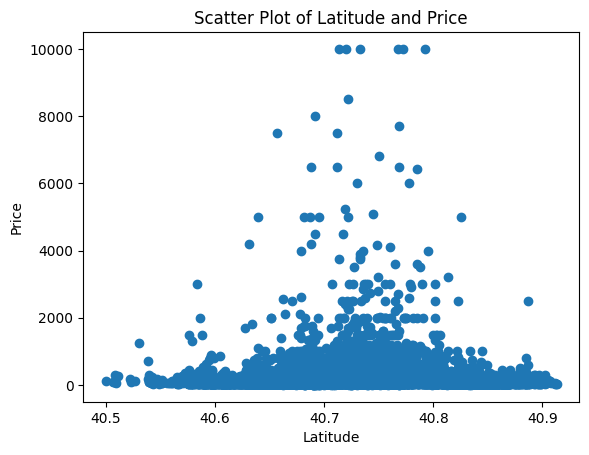

In [88]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
plt.scatter(dataset['latitude'], dataset['price'])
plt.title('Scatter Plot of Latitude and Price')
plt.xlabel('Latitude')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt.show()

#### Scatter Plot of Longitude and Price

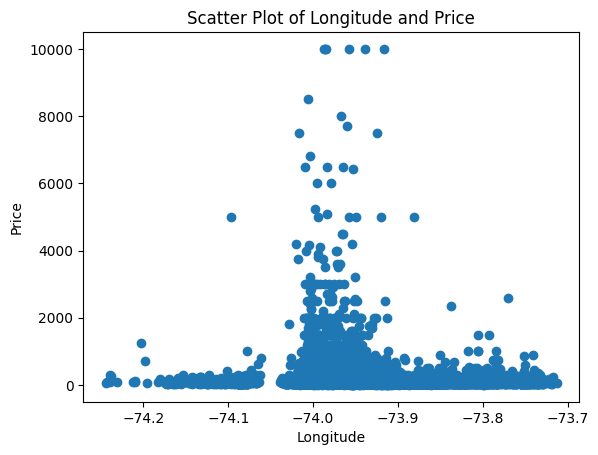

In [89]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
plt.scatter(dataset['longitude'], dataset['price'])
plt.title('Scatter Plot of Longitude and Price')
plt.xlabel('Longitude')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt.show()

#### Scatter Plot of Minimum Nights and Price

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

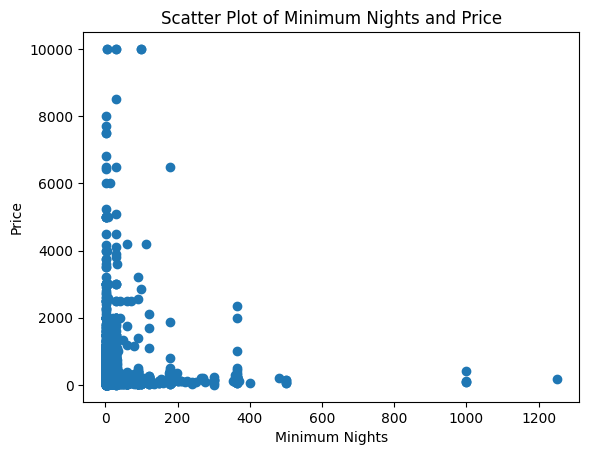

In [90]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
plt.scatter(dataset['minimum_nights'], dataset['price'])
plt.title('Scatter Plot of Minimum Nights and Price')
plt.xlabel('Minimum Nights')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt

#### Scatter Plot of Availability and Price

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

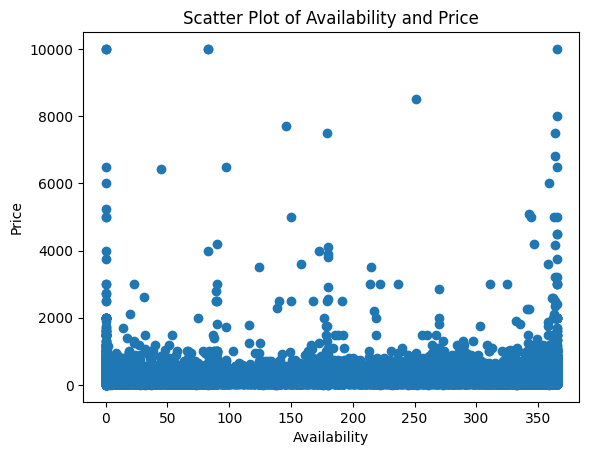

In [91]:
pd.set_option('display.max_columns', None)
#only include numerical feayures for boxplot
plt.scatter(dataset['availability_365'], dataset['price'])
plt.title('Scatter Plot of Availability and Price')
plt.xlabel('Availability')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt

#### Scatter Plot of Number of Reviews and Price

Text(0, 0.5, 'Price')

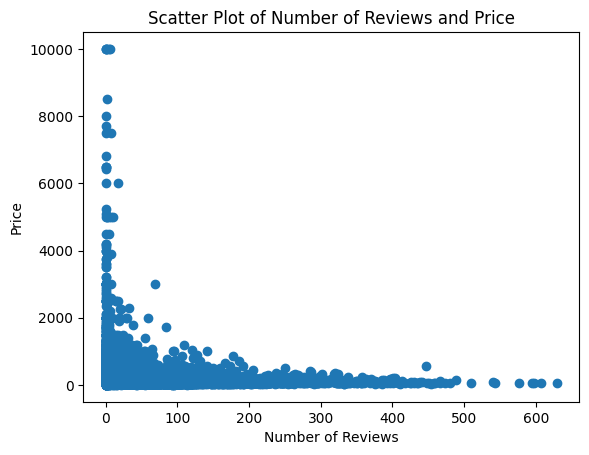

In [92]:
pd.set_option('display.max_columns', None)
#only include numerical feayures for boxplot
plt.scatter(dataset['number_of_reviews'], dataset['price'])
plt.title('Scatter Plot of Number of Reviews and Price')
plt.xlabel('Number of Reviews')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label

#### heatmap Plot of Reviews Per Month and Price

Text(50.58159722222221, 0.5, 'Price')

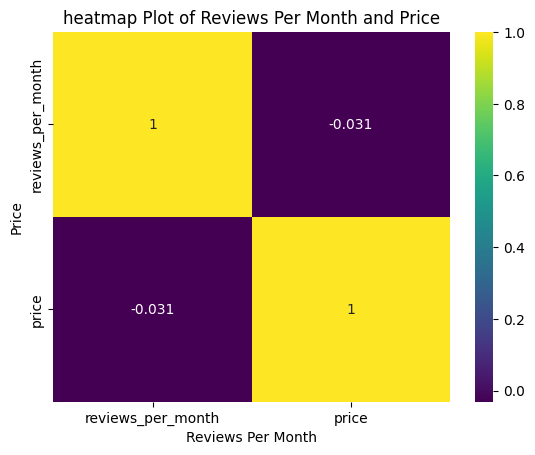

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['reviews_per_month', 'price']].corr(), annot=True, cmap='viridis') # Create a correlation matrix for heatmap
plt.title('heatmap Plot of Reviews Per Month and Price')
plt.xlabel('Reviews Per Month')  # Set x-axis label
plt.ylabel('Price')

#### heatmap Plot of number of reviews and price

Text(50.58159722222221, 0.5, 'Price')

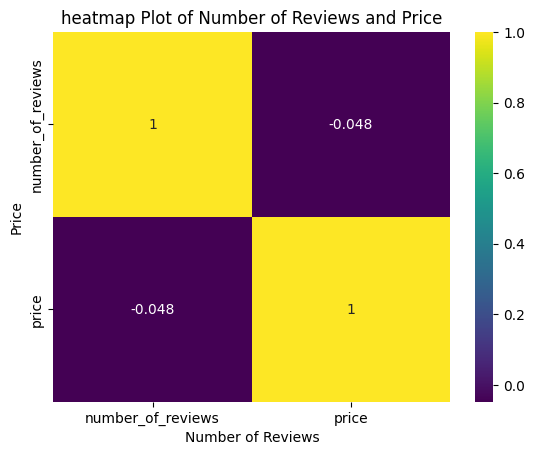

In [94]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['number_of_reviews', 'price']].corr(), annot=True, cmap='viridis') # Create a correlation matrix for heatmap
plt.title('heatmap Plot of number of reviews and price')
plt.xlabel('Number of Reviews')  # Set x-axis label
plt.ylabel('Price')  # Set


#### heatmap Plot of Calculated Host Listings Count and Price

Text(50.5815972222222, 0.5, 'Price')

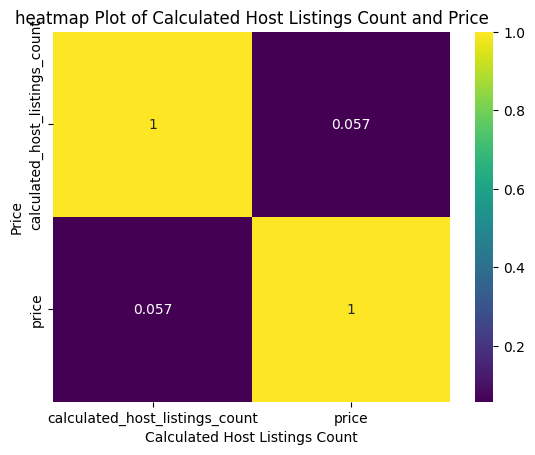

In [95]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['calculated_host_listings_count', 'price']].corr(), annot=True, cmap='viridis') # Create a correlation matrix for heatmap
plt.title('heatmap Plot of Calculated Host Listings Count and Price')
plt.xlabel('Calculated Host Listings Count')  # Set x-axis label
plt.ylabel('Price')  # Set

#### heatmap Plot of Availability and Price

Text(50.58159722222221, 0.5, 'Price')

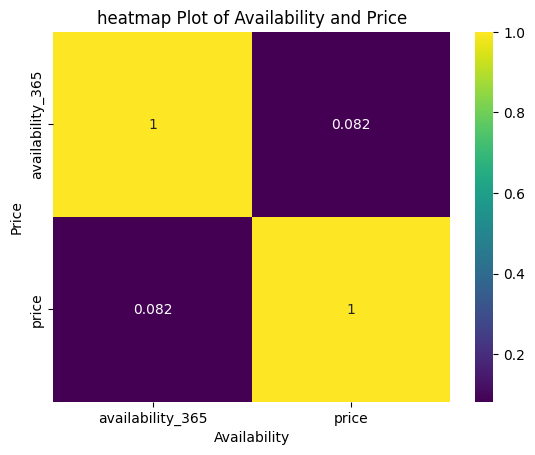

In [96]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['availability_365', 'price']].corr(), annot=True, cmap='viridis') # Create a
plt.title('heatmap Plot of Availability and Price')
plt.xlabel('Availability')  # Set x-axis label
plt.ylabel('Price')  # Set

#### heatmap Plot of Minimum Nights and Price

Text(50.58159722222221, 0.5, 'Price')

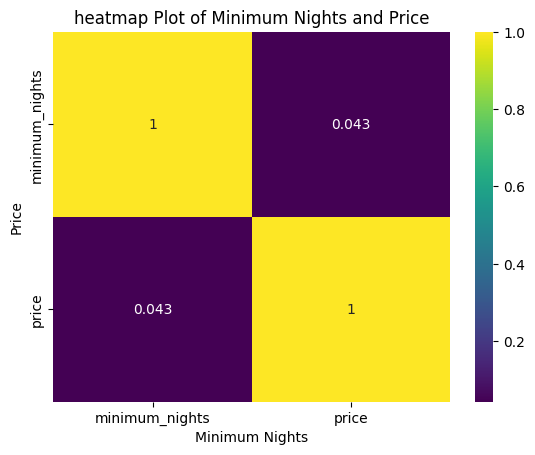

In [97]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['minimum_nights', 'price']].corr(), annot=True, cmap='viridis') # Create a correlation matrix for
plt.title('heatmap Plot of Minimum Nights and Price')
plt.xlabel('Minimum Nights')  # Set x-axis label
plt.ylabel('Price')  # Set

#### heatmap Plot of Latitude and Price

Text(50.722222222222214, 0.5, 'Price')

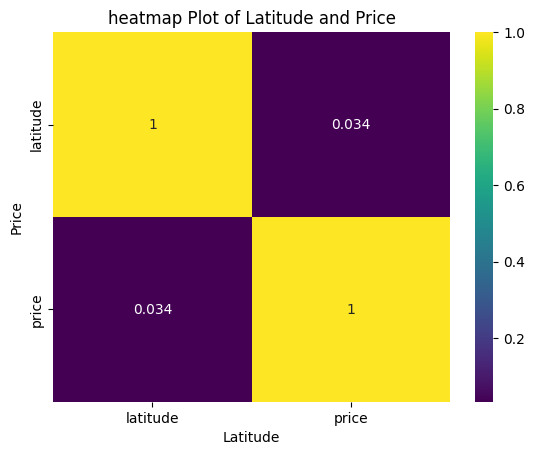

In [98]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['latitude', 'price']].corr(), annot=True, cmap='viridis')
plt.title('heatmap Plot of Latitude and Price')
plt.xlabel('Latitude')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label

#### heatmap Plot of Longitude and Price

Text(50.722222222222214, 0.5, 'Price')

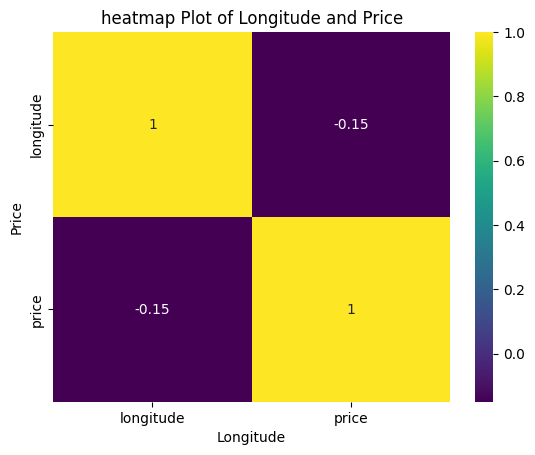

In [99]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
sns.heatmap(dataset[['longitude', 'price']].corr(), annot=True, cmap='viridis')
plt.title('heatmap Plot of Longitude and Price')
plt.xlabel('Longitude')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label

#### heatmap Plot of Neighbourhood Group and Price

Text(50.722222222222214, 0.5, 'Price')

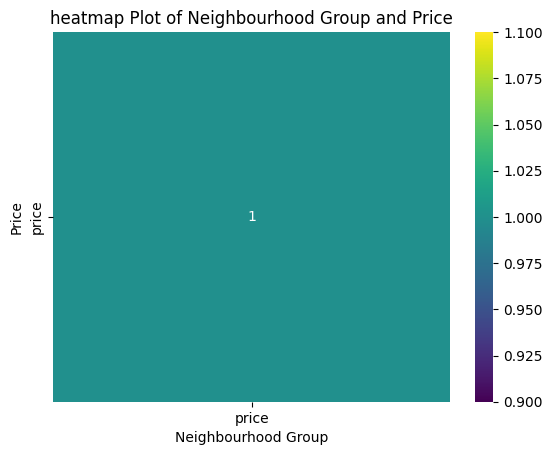

In [100]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
numerical_data = dataset[['neighbourhood_group', 'price']].select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('heatmap Plot of Neighbourhood Group and Price')
plt.xlabel('Neighbourhood Group')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label

#### heatmap Plot of Room Type and Price

Text(50.722222222222214, 0.5, 'Price')

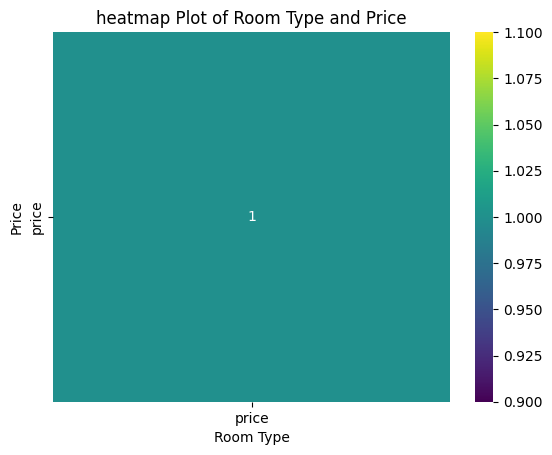

In [101]:
pd.set_option('display.max_columns', None)
# Only include numerical features for boxplot
numerical_data = dataset[['room_type', 'price']].select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('heatmap Plot of Room Type and Price')
plt.xlabel('Room Type')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label

#### heatmap Plot of high_availability = availability_365 > threshold and Price

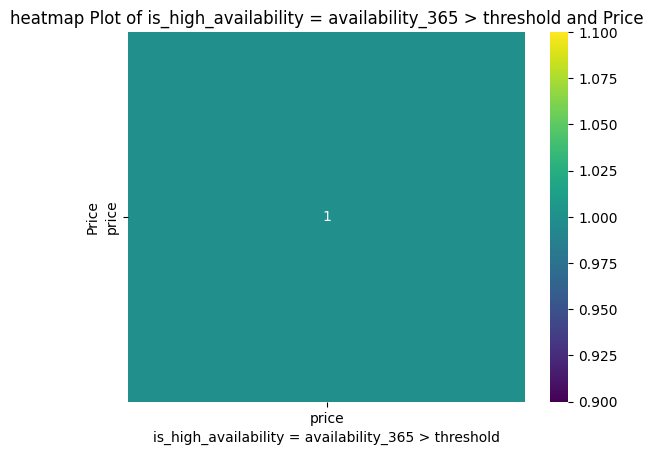

In [102]:
pd.set_option('display.max_columns', None)

# Assuming 'thresold' is a predefined value, replace with your actual threshold
threshold = 180

# Create 'high_availability' column based on 'availability_365' and threshold
dataset['high_availability'] = dataset['availability_365'] > threshold

# Select numerical data for the two columns
numerical_data = dataset[['high_availability', 'price']].select_dtypes(include=np.number)

# Generate the heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('heatmap Plot of is_high_availability = availability_365 > threshold and Price')
plt.xlabel('is_high_availability = availability_365 > threshold')
plt.ylabel('Price')
plt.show()

In [105]:
airbnb_df.to_csv("airbnb", index= False)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [48]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
airbnb_df = pd.read_csv('https://drive.google.com/uc?id=1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou&export=download') # Replace with your actual copied link

dataset=airbnb_df.copy()
dataset.info()

# Load your dataset
df = dataset.copy() # Assuming 'dataset' is the DataFrame you want to use

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights           

#### Chart - 1 - Pie Chart on Dependant Variable

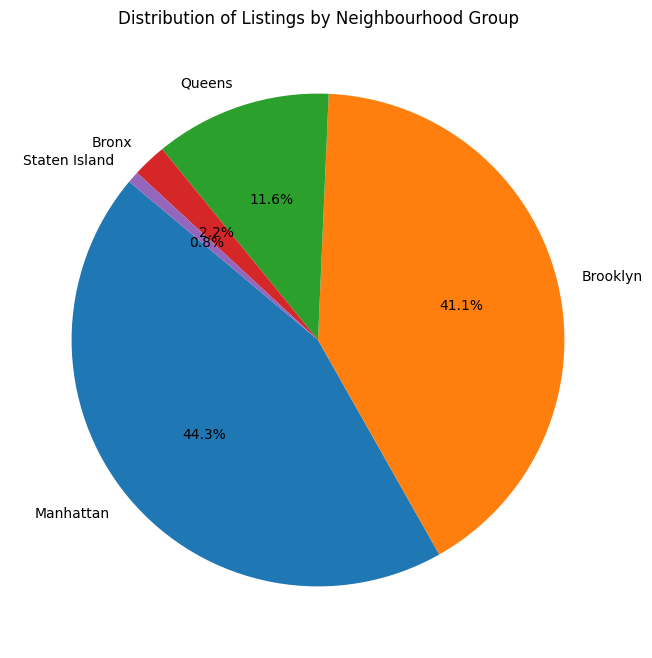

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Instead of loading 'airbnb_data.csv', use the existing 'dataset' DataFrame
# df = pd.read_csv("airbnb_data.csv")  # Remove or comment out this line
df = dataset.copy()  # Use the 'dataset' DataFrame directly

# Neighbourhood Group Pie Chart
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_counts, labels=neighbourhood_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Listings by Neighbourhood Group")
plt.show()

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

Manhattan Dominance: The largest portion of the pie is dedicated to "Manhattan," indicating that it has the highest number of Airbnb listings compared to other neighborhood groups in the dataset. This suggests that Manhattan is a very popular area for Airbnb rentals.

Brooklyn and Queens: Brooklyn and Queens are the next most popular neighborhood groups, although they have considerably fewer listings compared to Manhattan. This implies they are also popular choices for travelers, but not to the same extent as Manhattan.

Staten Island and Bronx: Staten Island and Bronx represent the smallest portions of the pie, showing they have the lowest number of Airbnb listings in the dataset. This suggests they might be less frequented by tourists or have fewer accommodations available on Airbnb.

Overall Distribution: The pie chart provides a clear visualization of the overall distribution of Airbnb listings across different neighborhood groups in the dataset. It highlights the relative popularity of each area for potential renters and hosts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


yes, the gained insights from the pie chart on the distribution of Airbnb listings by neighborhood group can certainly help in creating a positive business impact in several ways:

For Airbnb Hosts and Property Managers:

Targeted Marketing: Understanding the popularity of different neighborhood groups allows hosts to tailor their marketing efforts. For example, hosts in Manhattan could focus on highlighting their property's proximity to popular attractions, while hosts in Brooklyn or Queens might emphasize their unique neighborhood experiences.

Pricing Strategies: Insights into the demand and competition within each neighborhood group can help hosts optimize their pricing strategies. Hosts in high-demand areas like Manhattan might be able to command higher prices, while those in less popular areas might need to offer competitive rates to attract guests.

Property Development: The data can guide investors and property developers in making informed decisions about where to invest in new Airbnb properties. Areas with high demand and limited supply, like Manhattan, could present attractive investment opportunities.

For Businesses Catering to Airbnb Guests:

Location-Based Services: Businesses offering services to Airbnb guests, such as tour operators, restaurants, and transportation providers, can use the insights to target their offerings to specific neighborhood groups. For example, a food tour operator might focus on creating experiences in Brooklyn known for its diverse culinary scene.

Marketing and Partnerships: Businesses can tailor their marketing campaigns to attract guests staying in different neighborhood groups. They could also explore partnerships with Airbnb hosts or property managers in popular areas to offer exclusive deals or packages to their guests.

Resource Allocation: Businesses can optimize their resource allocation based on the demand patterns in different neighborhood groups. For example, a bike rental company might station more bikes in areas with high tourist traffic, like Manhattan or Brooklyn.

For Airbnb as a Platform:

Product Development: The insights can inform Airbnb's product development efforts, such as recommending popular neighborhoods to guests or suggesting pricing strategies to hosts based on location.

Community Building: Airbnb can use the data to foster a sense of community among hosts and guests in different neighborhood groups. This could involve organizing local events or creating online forums for sharing information and experiences.

Policy Advocacy: The data can be used to advocate for policies that support the responsible growth of the Airbnb market in different neighborhood groups. This could include working with local governments to develop regulations that balance the interests of hosts, guests, and residents.

Overall, the insights gained from the pie chart provide valuable data points that can be leveraged by various stakeholders to make informed decisions, improve their offerings, and contribute to the positive growth of the Airbnb ecosystem in New York City. By understanding the distribution of listings and the preferences of travelers, businesses and individuals can strategically position themselves for success in the competitive Airbnb market.

#### Chart - 2 - Average Price by Neighborhood Group

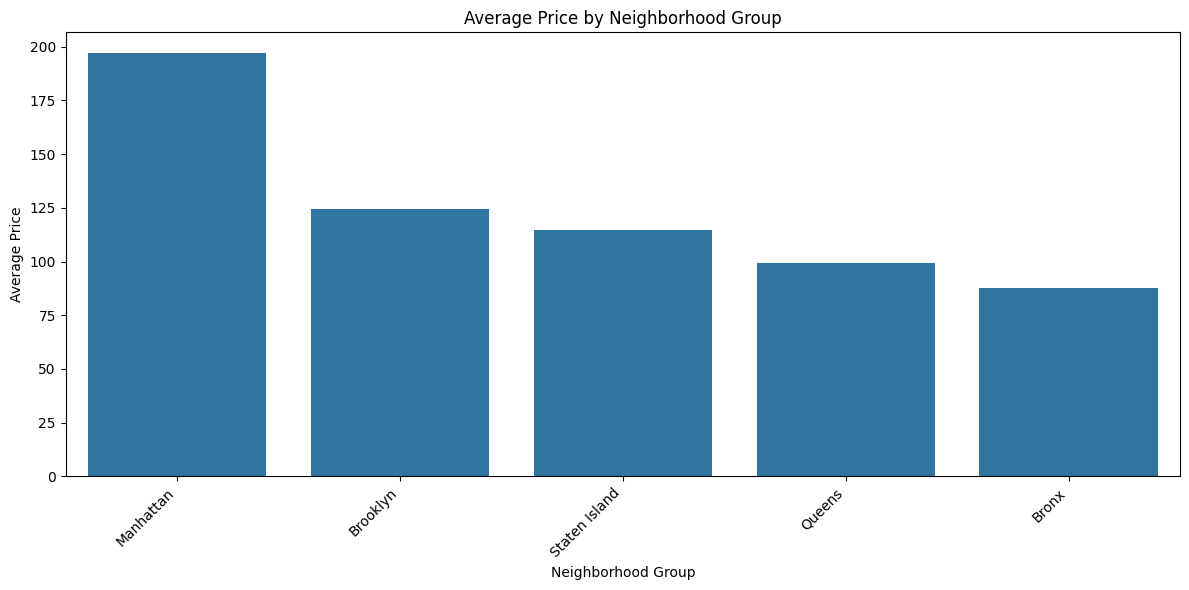

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per neighborhood group
avg_price_by_neighborhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values)
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Manhattan Price Premium: As the chart clearly illustrates, Manhattan stands out with the highest average price for Airbnb listings. This suggests a strong demand and potentially a limited supply of accommodations in this popular borough, leading to higher prices.

Brooklyn and Queens - Mid-Range Options: Brooklyn and Queens offer a more moderate price range compared to Manhattan. This could indicate a wider variety of accommodation types and a balance between demand and supply in these areas.

Staten Island and Bronx - Budget-Friendly: Staten Island and Bronx exhibit the lowest average prices among all neighborhood groups. This makes them attractive destinations for budget-conscious travelers seeking more affordable options.

Overall Price Variation: The chart effectively demonstrates a clear variation in average Airbnb prices across different neighborhood groups in New York City. This underscores the importance of location when considering both hosting and booking Airbnb accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely! The insights gained from Chart - 2, showcasing the "Average Price by Neighborhood Group," can significantly contribute to creating a positive business impact for various stakeholders in the Airbnb ecosystem.

Here's how the insights can be leveraged for positive business outcomes:

For Airbnb Hosts and Property Managers:

Strategic Pricing: Hosts can utilize the average price data to establish competitive and profitable pricing strategies for their listings. Hosts in Manhattan can confidently price their properties higher due to the demonstrated high demand and premium rates in the area. Conversely, hosts in Staten Island or Bronx might consider offering more competitive pricing to attract budget-conscious travelers. This data-driven approach to pricing optimization can lead to increased bookings and revenue.

Targeted Marketing: Understanding the price variations across neighborhood groups allows hosts to refine their marketing efforts. Hosts in Manhattan can highlight the value and exclusivity of their location, emphasizing proximity to attractions and vibrant city life. Those in other boroughs can showcase unique neighborhood experiences, affordability, or specific amenities that cater to different traveler segments. This targeted marketing approach can attract the right guests and maximize occupancy rates.

Property Investment Decisions: The chart provides valuable insights for investors and property developers looking to enter or expand their presence in the Airbnb market. By identifying areas with high demand and strong pricing potential, such as Manhattan, investors can make informed decisions about property acquisitions or development projects, maximizing their return on investment.

For Businesses Catering to Airbnb Guests:

Location-Based Services: Businesses offering services to Airbnb guests, such as tour operators, restaurants, or transportation providers, can leverage the price data to tailor their offerings to specific neighborhood groups. For example, a luxury car rental service might focus its marketing efforts on guests staying in Manhattan, while a budget-friendly bike rental company might target travelers in Brooklyn or Queens. This tailored approach can increase customer acquisition and revenue.

Marketing and Partnerships: Businesses can use the insights to develop targeted marketing campaigns that resonate with guests in different neighborhood groups. They can also explore strategic partnerships with Airbnb hosts or property managers in high-demand areas to offer exclusive deals or packages to their guests. This collaborative approach can drive customer engagement and sales.

Resource Allocation: Understanding the price patterns and demand levels in different neighborhood groups enables businesses to optimize their resource allocation. For example, a cleaning service might prioritize servicing properties in Manhattan due to the higher frequency of bookings and potentially higher cleaning fees. This efficient resource allocation can improve operational efficiency and profitability.

For Airbnb as a Platform:

Enhanced Recommendations: Airbnb can integrate the price data into its recommendation algorithms to provide more personalized and relevant suggestions to travelers searching for accommodations. By highlighting listings in specific neighborhood groups based on their budget and preferences, Airbnb can enhance the user experience and increase booking conversion rates.

Host Support: Airbnb can use the insights to develop educational resources and tools that empower hosts with data-driven pricing strategies and marketing tips tailored to their property's location. This proactive support can help hosts maximize their earnings and contribute to the overall success of the platform.

Market Analysis and Development: Airbnb can leverage the price data to analyze market trends, identify growth opportunities, and develop strategies to further expand its presence in specific neighborhood groups. This continuous market analysis can drive platform expansion and solidify Airbnb's position as a leader in the accommodation industry.

In conclusion, the insights gained from Chart - 2 on "Average Price by Neighborhood Group" offer significant value for various stakeholders in the Airbnb ecosystem. By understanding the price dynamics and traveler preferences across different neighborhoods, businesses and individuals can make informed decisions, optimize their strategies, and drive positive business outcomes. The data empowers everyone involved to navigate the Airbnb market effectively, leading to increased bookings, revenue, and overall success.

#### Chart - 3 - Distribution of Room Types on Airbnb

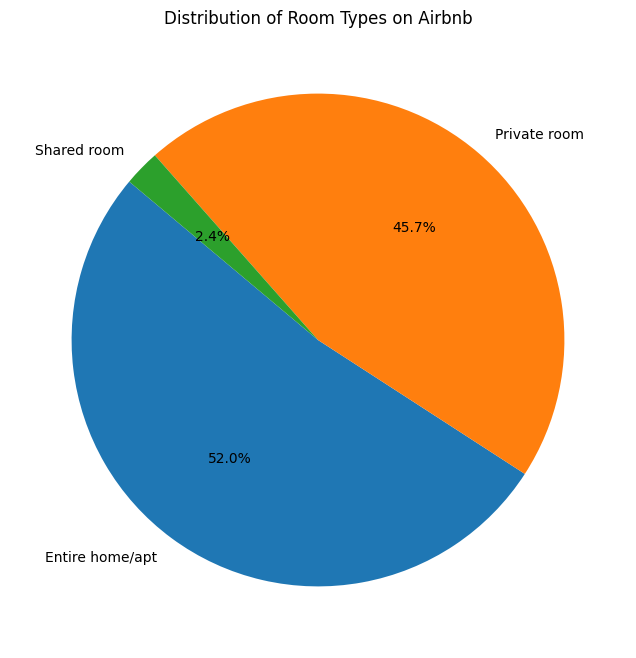

In [51]:
import matplotlib.pyplot as plt

# Calculate the count of each room type
room_type_counts = df['room_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types on Airbnb')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the churn percentage account length wise.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. So, I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.

##### 2. What is/are the insight(s) found from the chart?

Entire Home/Apt Dominance: The most prominent slice of the pie belongs to "Entire home/apt" listings, indicating that they constitute the majority of accommodations offered on Airbnb in New York City. This suggests a strong preference among travelers for having an entire space to themselves, enjoying privacy, and having access to a full range of amenities.

Private Room Popularity: "Private room" listings represent a significant portion of the offerings, highlighting their popularity among travelers seeking a balance between affordability and privacy. These listings provide guests with their own private space while allowing them to interact with hosts or other guests in shared common areas.

Shared Room Scarcity: "Shared room" listings occupy the smallest slice of the pie, indicating their relatively lower demand compared to other room types. This suggests that travelers generally prefer more privacy and personal space, opting for entire homes/apartments or private rooms instead of sharing a room with others.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely! The insights gained from Chart - 3, illustrating the "Distribution of Room Types on Airbnb," have the potential to create a significant positive business impact for various stakeholders in the Airbnb ecosystem.

Here's a breakdown of how these insights can be leveraged for positive business outcomes:

For Airbnb Hosts and Property Managers:

Optimized Listing Strategies: Hosts can align their listing strategies with traveler preferences by focusing on offering the most in-demand room types. Since "Entire home/apt" listings dominate the market, hosts with properties suitable for this category can expect higher demand and potentially higher rental rates. This strategic approach can lead to increased bookings and revenue.

Targeted Property Development: The data can inform investment decisions for property developers or hosts looking to expand their Airbnb portfolio. Investing in properties that can be listed as "Entire home/apt" could yield higher returns due to their popularity among travelers. Alternatively, developing properties with multiple private rooms could cater to a different segment of the market while still offering attractive returns.

#### Chart - 4 - Distribution of Prices by Neighborhood Group

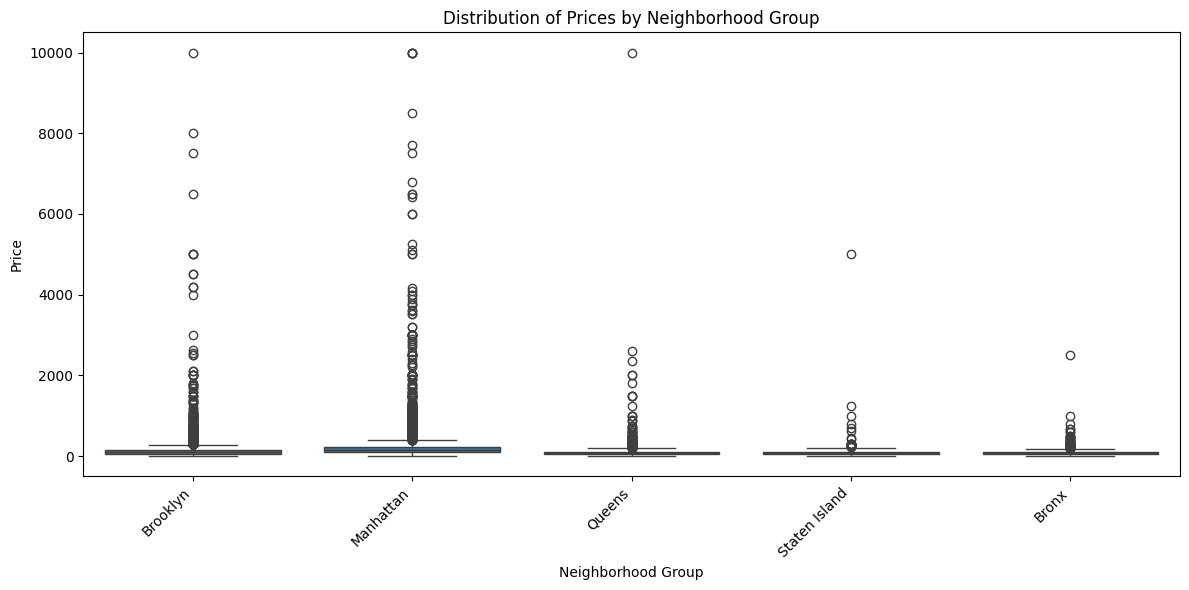

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Distribution of Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


Reasons for Choosing a Box Plot:

Visualizing Price Distribution: Box plots excel at displaying the distribution of a numerical variable (price in this case) across different categories (neighborhood groups). They effectively show the median, quartiles, range, and potential outliers, providing a comprehensive overview of price variations within each category.

Comparing Price Ranges: Box plots allow for easy comparison of price ranges across different neighborhood groups. By visually comparing the boxes and whiskers, we can quickly identify which groups have higher or lower typical prices, as well as the extent of price variability within each group.

Identifying Outliers: Box plots effectively highlight outliers, which are data points that fall significantly outside the typical price range for a particular neighborhood group. These outliers can represent unique or exceptional listings, providing valuable insights for both hosts and travelers.

Handling Skewed Data: Price data often exhibits skewness, meaning it is not symmetrically distributed. Box plots are robust to skewness and can effectively visualize skewed distributions, unlike histograms or bar charts that might misrepresent the data.

Concise Representation: Box plots provide a concise and informative representation of the data, allowing for easy interpretation and comparison of price distributions across multiple categories.

##### 2. What is/are the insight(s) found from the chart?

Okay, let's delve into the insights we can extract from Chart - 4, which showcases the "Distribution of Prices by Neighborhood Group" for Airbnb listings in New York City using a box plot.

Insights from Chart - 4:

Manhattan's Price Premium: Manhattan stands out with the highest median price, indicating a significantly higher price range compared to other neighborhood groups. This reflects the borough's desirability, central location, and abundance of attractions, making it a premium destination for travelers.

Brooklyn and Queens - Mid-Range Options: Brooklyn and Queens offer a more moderate price range, with median prices falling between those of Manhattan and the more affordable boroughs. This suggests a wider variety of accommodation options and a balance between demand and supply in these areas.

Staten Island and Bronx - Budget-Friendly Choices: Staten Island and Bronx generally have the lowest price ranges, with the most affordable median prices. This makes them attractive destinations for budget-conscious travelers seeking economical accommodations without compromising on quality or experience.

Price Variability within Groups: The box plot also reveals the price variability within each neighborhood group. Manhattan displays the widest price range, indicating greater diversity in listing types and price points, including luxury and premium options. Brooklyn and Queens show moderate price variability, while Staten Island and Bronx have relatively narrower price ranges.

Outliers: The presence of outliers, particularly in Manhattan and Brooklyn, highlights the existence of listings with exceptionally high prices. These outliers could represent unique properties, luxury accommodations, or listings with specific features that command a premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely! The insights gained from Chart - 4, showcasing the "Distribution of Prices by Neighborhood Group," can significantly contribute to creating a positive business impact for various stakeholders in the Airbnb ecosystem.

Here's how the insights can be leveraged for positive business outcomes:

For Airbnb Hosts and Property Managers:

Strategic Pricing: Hosts can utilize the average price data to establish competitive and profitable pricing strategies for their listings. Hosts in Manhattan can confidently price their properties higher due to the demonstrated high demand and premium rates in the area. Conversely, hosts in Staten Island or Bronx might consider offering more competitive pricing to attract budget-conscious travelers. This data-driven approach to pricing optimization can lead to increased bookings and revenue.

Targeted Marketing: Understanding the price variations across neighborhood groups allows hosts to refine their marketing efforts. Hosts in Manhattan can highlight the value and exclusivity of their location, emphasizing proximity to attractions and vibrant city life. Those in other boroughs can showcase unique neighborhood experiences, affordability, or specific amenities that cater to different traveler segments. This targeted marketing approach can attract the right guests and maximize occupancy rates.

Property Investment Decisions: The chart provides valuable insights for investors and property developers looking to enter or expand their presence in the Airbnb market. By identifying areas with high demand and strong pricing potential, such as Manhattan, investors can make informed decisions about property acquisitions or development projects, maximizing their return on investment.

#### Chart - 5 Distribution of Prices by Room Type

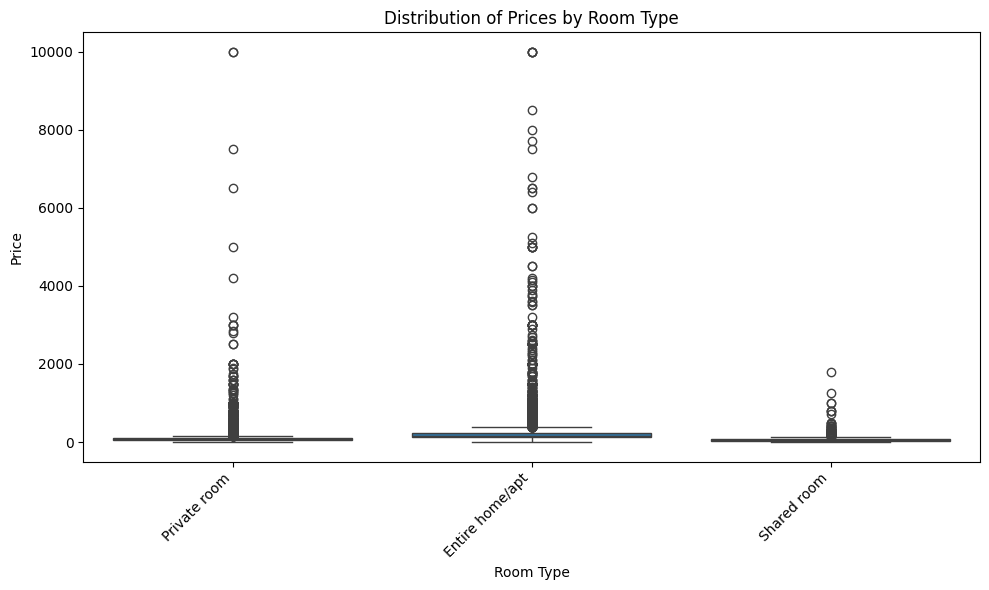

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribution of Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Visualizing Price Distribution across Categories: Box plots are excellent for displaying the distribution of a numerical variable (price, in this case) across different categories (room types). They effectively show the median, quartiles, range, and potential outliers, providing a comprehensive overview of price variations within each category. This allows us to see how prices are distributed for each room type and compare them easily.

Comparing Price Ranges: Box plots facilitate easy comparison of price ranges across different room types. By visually comparing the boxes and whiskers, we can quickly identify which room types have higher or lower typical prices, as well as the extent of price variability within each type. This helps us understand the relative price differences between entire homes/apartments, private rooms, and shared rooms.

Identifying Outliers: Box plots effectively highlight outliers, which are data points that fall significantly outside the typical price range for a particular room type. These outliers can represent unique or exceptional listings, potentially indicating luxury properties or those with special features that command higher prices. Identifying these outliers can be valuable for both hosts and travelers.

Handling Skewed Data: Price data often exhibits skewness, meaning it is not symmetrically distributed. Box plots are robust to skewness and can effectively visualize skewed distributions, unlike histograms or bar charts that might misrepresent the data. This is important for accurately representing the price distribution for each room type.

Concise Representation: Box plots provide a concise and informative representation of the data, allowing for easy interpretation and comparison of price distributions across multiple categories. This makes them a good choice for presenting a clear and concise overview of the relationship between room type and price.

##### 2. What is/are the insight(s) found from the chart?

Entire Home/Apt Price Premium: As expected, "Entire home/apt" listings generally command the highest prices. The box plot reveals a significantly higher median price for this room type compared to others, along with a wider price range. This reflects the greater value, privacy, and space offered by entire homes or apartments, making them attractive to travelers willing to pay a premium for these benefits.

Private Room - Mid-Range Option: "Private room" listings occupy a mid-range price position. Their median price is lower than entire homes/apartments but higher than shared rooms. This suggests that private rooms offer a balance between affordability and privacy, catering to travelers seeking a more budget-friendly option without sacrificing personal space.

Shared Room - Budget-Friendly Choice: "Shared room" listings, as anticipated, have the lowest prices. The box plot shows the most affordable median price and a narrower price range for this room type. This positions shared rooms as a cost-effective option for budget-conscious travelers prioritizing affordability over privacy or exclusive space.

Price Variability within Room Types: The chart also reveals price variability within each room type. "Entire home/apt" listings exhibit the widest price range, indicating greater diversity in property sizes, amenities, and locations, leading to a broader range of price points. "Private room" listings show moderate price variability, while "Shared room" listings have a relatively narrower price range, suggesting less variation in pricing within this category.

Outliers: The presence of outliers, particularly in the "Entire home/apt" category, highlights the existence of exceptionally high-priced listings. These outliers could represent luxury properties, unique accommodations, or listings with premium features that command a higher price. Identifying these outliers can be valuable for both hosts and travelers seeking exceptional or exclusive options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely! The insights gained from Chart - 5, which illustrates the "Distribution of Prices by Room Type" using a box plot, have the potential to significantly contribute to creating a positive business impact for various stakeholders in the Airbnb ecosystem.

#### Chart 6 - Average Availability by Neighborhood Group

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

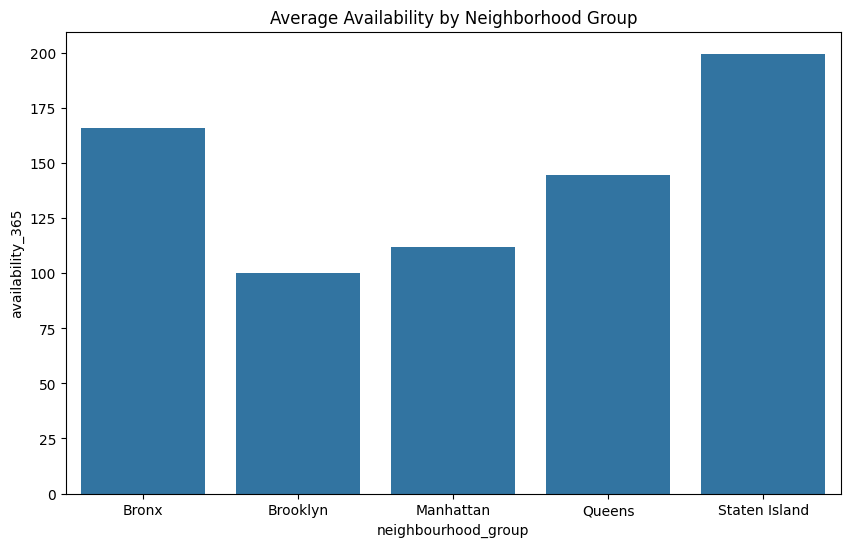

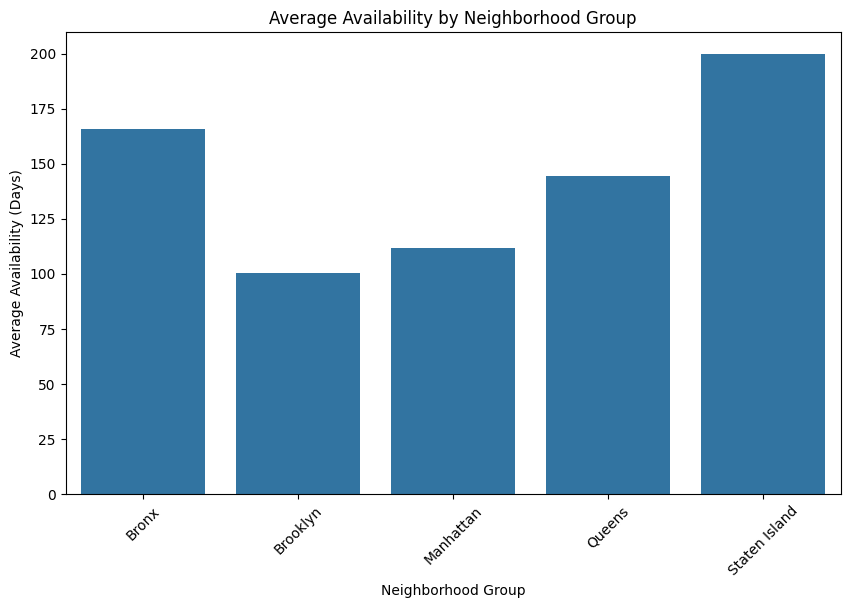

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average availability for each neighborhood group
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='availability_365', data=avg_availability)
plt.title('Average Availability by Neighborhood Group')
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average availability for each neighborhood group
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='availability_365', data=avg_availability)
plt.title('Average Availability by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Comparing Averages across Categories: Bar plots are excellent for comparing the average values of a numerical variable (availability_365, in this case) across different categories (neighborhood groups). They provide a clear visual representation of the average availability for each neighborhood, making it easy to compare them side-by-side. This allows us to quickly identify which neighborhoods have higher or lower average availability.

Visualizing Categorical Data: Bar plots are particularly well-suited for displaying categorical data, where the x-axis represents distinct categories (neighborhood groups), and the y-axis shows the corresponding values (average availability). This makes them a natural choice for visualizing the relationship between a categorical variable and a numerical variable, as in this case.

Easy Interpretation: Bar plots are generally easy to interpret and understand. The height of each bar directly corresponds to the average availability for a specific neighborhood, making it straightforward to compare availability across different neighborhoods. This simplicity makes the chart accessible to a wide audience, including those without a strong statistical background.

Effective for Aggregate Data: Since we are interested in the average availability for each neighborhood group, a bar plot is an effective way to visualize this aggregate data. It summarizes the information concisely, allowing us to focus on the overall availability patterns across different neighborhoods.

Highlighting Differences: Bar plots effectively highlight differences in average availability between neighborhood groups. By visually comparing the heights of the bars, we can quickly identify which neighborhoods have significantly higher or lower availability compared to others. This helps us understand the relative availability patterns across different parts of New York City.

##### 2. What is/are the insight(s) found from the chart?

Staten Island and Bronx with Highest Availability: As clearly shown by the tallest bars in the chart, Staten Island and Bronx generally have the highest average availability throughout the year. This means that listings in these boroughs are available for booking on more days compared to other neighborhood groups. This suggests either lower overall demand or a higher supply of listings in these areas.

Manhattan and Brooklyn with Lower Availability: In contrast, Manhattan and Brooklyn exhibit the lowest average availability, indicated by the shortest bars in the chart. This implies that listings in these popular boroughs tend to be booked more frequently or have shorter booking windows. This is likely due to the high demand and popularity of these central locations among travelers, leading to limited availability.

Queens - Moderate Availability: Queens displays a moderate average availability, falling between the extremes of Staten Island/Bronx and Manhattan/Brooklyn. This suggests a balance between supply and demand in this borough, offering travelers a decent chance of finding available listings without facing the extreme limitations of the most popular areas.

Potential Explanations for Availability Patterns:

Tourism and Demand: Manhattan and Brooklyn, being the primary tourist destinations and business hubs, experience higher demand for accommodations, leading to lower availability. Staten Island and Bronx, while offering unique attractions, might not attract the same level of tourist traffic, resulting in higher availability.
Listing Density: The number of Airbnb listings in each neighborhood group could also influence availability. Areas with a higher concentration of listings might have lower average availability due to increased competition for bookings.
Seasonality: While the chart displays average availability throughout the year, it's important to consider that availability can fluctuate seasonally. Peak travel seasons might see lower availability across all neighborhood groups, while off-season periods could offer more options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from Chart - 6, which visualizes the "Average Availability by Neighborhood Group" using a bar plot, have the potential to create a positive business impact for various stakeholders in the Airbnb ecosystem.

#### Chart - 7- Average Price by Room Type and Neighborhood Group

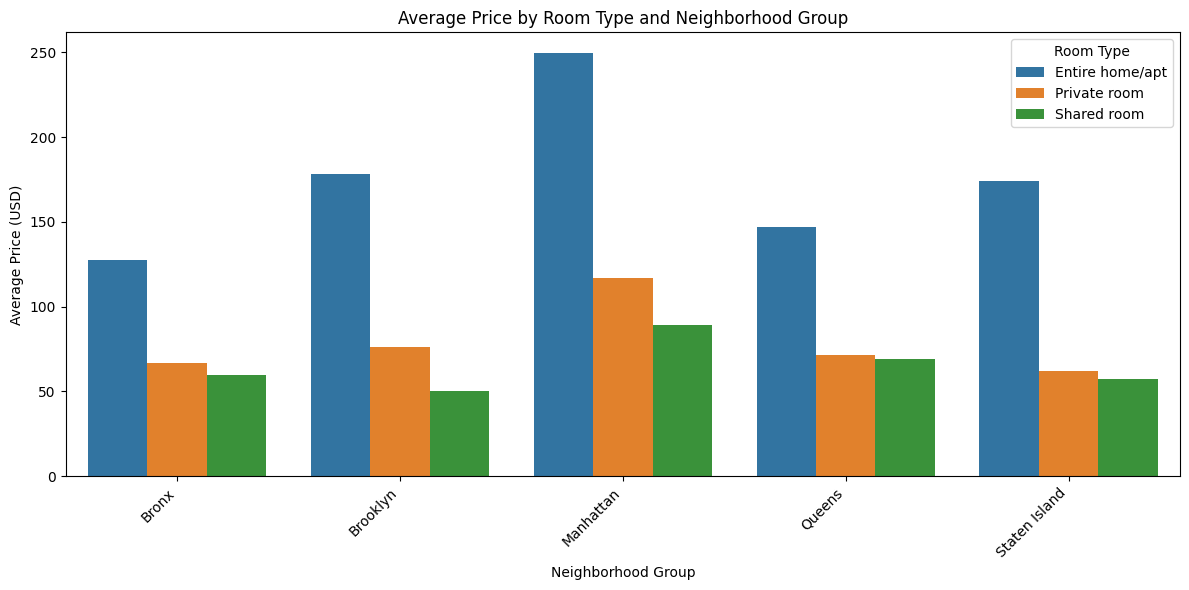

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average price for each room type and neighborhood group
avg_price = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=avg_price)
plt.title('Average Price by Room Type and Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



Reasons for Choosing a Grouped Bar Plot:

Comparing Averages across Multiple Categories: A grouped bar plot is ideal for comparing the average values of a numerical variable (price, in this case) across multiple categorical variables (room_type and neighbourhood_group). It allows us to see how the average price varies for different room types within each neighborhood group and how prices compare across different neighborhood groups for the same room type. This provides a comprehensive overview of the price dynamics in the Airbnb market.

Visualizing Categorical Relationships: Grouped bar plots are particularly effective for visualizing the relationship between multiple categorical variables and a numerical variable. In this case, we want to understand how the average price is influenced by both room type and neighborhood group. The grouped bars clearly show the interplay between these categorical variables and their impact on price.

Easy Interpretation: Grouped bar plots are generally easy to interpret. The height of each bar represents the average price, and the grouping by room type within each neighborhood group makes it straightforward to compare prices across different categories. This simplicity makes the chart accessible to a wide audience, including those without a strong statistical background.

Effective for Aggregate Data: Since we are interested in the average price for each combination of room type and neighborhood group, a grouped bar plot is an effective way to visualize this aggregate data. It summarizes the information concisely, allowing us to focus on the overall price patterns across different categories.

Highlighting Differences and Similarities: Grouped bar plots effectively highlight both differences and similarities in average prices. By visually comparing the heights of the bars within and across neighborhood groups, we can identify which room types are more expensive or affordable in specific areas and how prices compare across different neighborhoods for the same room type.

##### 2. What is/are the insight(s) found from the chart?

Okay, let's delve into the insights we can derive from Chart - 7, which displays the "Average Price by Room Type and Neighborhood Group" using a grouped bar plot for the Airbnb dataset.

Insights from Chart - 7:

Entire Home/Apt Price Premium: Across all neighborhood groups, "Entire home/apt" listings consistently command the highest average prices, as indicated by the tallest bars within each neighborhood group. This highlights the premium value associated with renting an entire home or apartment, offering greater space, privacy, and amenities compared to other room types. Travelers are willing to pay more for the convenience and exclusivity of having an entire space to themselves.

Manhattan's Price Dominance: Manhattan stands out as the most expensive neighborhood group for all room types, with significantly higher average prices compared to other boroughs. This reflects the high demand, central location, and limited availability of accommodations in Manhattan. Travelers seeking to stay in the heart of New York City can expect to pay a premium for the convenience and access to attractions and amenities that Manhattan offers.

Private Room - Mid-Range Option: "Private room" listings generally occupy a mid-range price position, falling between entire homes/apartments and shared rooms. This suggests that private rooms offer a balance between affordability and privacy, making them a popular choice for travelers seeking a more budget-friendly option without sacrificing personal space. Travelers who prioritize privacy but are on a tighter budget often find private rooms to be a suitable compromise.

Shared Room - Budget-Friendly Choice: "Shared room" listings consistently have the lowest average prices across all neighborhood groups, making them the most affordable option for budget-conscious travelers. This reflects the shared nature of the accommodation and the lower level of privacy and amenities typically offered in shared rooms. Travelers who prioritize affordability and are comfortable sharing a space with others often opt for shared rooms.

Neighborhood Price Variations: While Manhattan generally has the highest prices, there are notable price variations within other neighborhood groups as well. For example, Brooklyn's average prices for entire homes/apartments are relatively close to Manhattan's, while prices for private and shared rooms are comparatively lower. This suggests that Brooklyn offers a mix of premium and budget-friendly options depending on the desired room type. Travelers seeking a balance between affordability and proximity to Manhattan might find Brooklyn to be an attractive alternative.

Price Differences by Room Type within Neighborhoods: The chart reveals that the price differences between room types can vary significantly within each neighborhood group. For instance, in Manhattan, the price gap between entire homes/apartments and shared rooms is much larger than in Staten Island or Bronx. This indicates that the price premium for certain room types is more pronounced in high-demand areas like Manhattan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from Chart - 7, which visualizes the "Average Price by Room Type and Neighborhood Group" using a grouped bar plot, have the potential to create a positive business impact for various stakeholders in the Airbnb ecosystem.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.


Optimize Search and Filtering: Enhance search functionality with filters based on price range, room type, neighborhood group, amenities, and availability to help travelers quickly find suitable accommodations that meet their specific needs and preferences. This improves user experience and facilitates faster booking decisions.

Personalized Recommendations: Implement a recommendation system that suggests listings to travelers based on their past bookings, preferences, search history, and budget. This personalized approach increases engagement and helps travelers discover relevant listings they might not have found otherwise, leading to increased bookings.

Dynamic Pricing Tools: Provide hosts with data-driven insights and tools to optimize their pricing strategies based on market demand, seasonality, competitor pricing, and availability. This empowers hosts to make informed pricing decisions, maximizing their revenue potential and attracting more bookings.

Neighborhood Guides and Local Experiences: Enhance the platform with comprehensive neighborhood guides that showcase local attractions, restaurants, activities, and unique experiences in different areas. This helps travelers explore new destinations and discover hidden gems, adding value to their Airbnb stay and encouraging bookings in diverse neighborhoods.

Promote Listings in Underserved Areas: Implement marketing campaigns and initiatives to promote listings in less popular neighborhood groups with higher availability. This helps distribute demand more evenly across different areas, benefiting both hosts in underserved areas and travelers seeking alternative options, leading to increased bookings and revenue for the platform.

Host Support and Education: Provide hosts with resources, training, and support to improve their listing quality, guest communication, and overall hosting experience. This empowers hosts to deliver exceptional service, leading to positive guest reviews, increased bookings, and higher earnings.

Data-Driven Market Analysis: Continuously analyze market trends, traveler preferences, and competitor dynamics to identify growth opportunities, develop targeted marketing campaigns, and refine platform features to better serve both hosts and travelers. This data-driven approach ensures that Airbnb stays ahead of the curve and adapts to evolving market needs, driving sustained success.

# **Conclusion**

Through our exploratory data analysis (EDA) of the Airbnb dataset, we uncovered key insights into pricing trends, availability, host behavior, and customer preferences.

Pricing Trends

Prices vary significantly based on neighbourhood group, room type, and availability.
Listings in prime locations tend to have higher prices, while shared accommodations are more affordable.
Host Behavior

Some hosts manage multiple listings, indicating professional hosting.
The distribution of host listings suggests a mix of individual and business-oriented hosts.
Availability & Demand

Many listings have high availability, but certain areas show seasonal fluctuations.
The number of reviews per month provides insights into guest activity and popularity.
Customer Preferences

Private rooms and entire homes are highly preferred over shared rooms.
Listings with frequent reviews tend to have higher engagement and possibly better service quality.
Recommendations
Hosts should optimize pricing strategies based on competitor analysis and demand trends.
Areas with high demand but low availability may benefit from new listings.
Improved host engagement and better customer service could enhance guest satisfaction and reviews.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***